In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [3]:
df = pd.read_csv("bank-additional-full.csv", sep=";")

In [4]:
# Show first few rows
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


- age (numeric)
- job : type of job 
- marital : marital status 
- education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
- default: has credit in default? 
- housing: has housing loan? (categorical: "no","yes","unknown")
- loan: has personal loan? (categorical: "no","yes","unknown")
##### related with the last contact of the current campaign:
- contact: contact communication type (categorical: "cellular","telephone") 
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
- duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
##### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
##### social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)     
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target): 21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [6]:
# Check Data Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

* No missing values in the dataset
* Features are a mix of categorical & numerical

# Exploratory Data Analysis (EDA)

In [9]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
# Basic statistics
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
# Check for duplicates
df.duplicated().sum()

12

In [12]:
# Drop duplicates if needed
df.drop_duplicates(inplace=True)

### Target Variable Distribution (count)

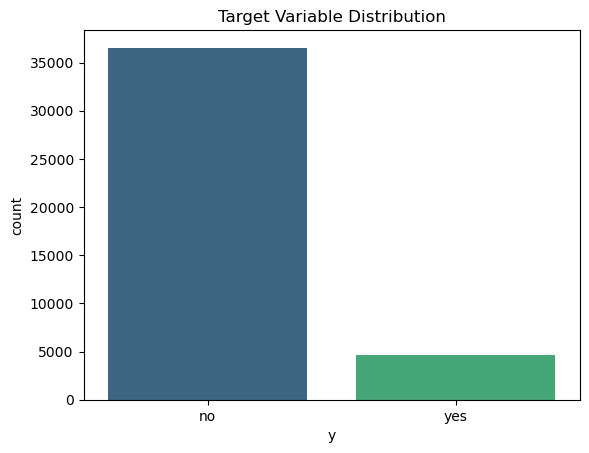

y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64

In [14]:
sns.countplot(data=df, x='y',hue='y', palette='viridis')
plt.title("Target Variable Distribution")
plt.show()

df['y'].value_counts(normalize=True)

The dataset is imbalanced: more "no" responses than "yes".

## Numerical Features Analysis

### Age Distribution

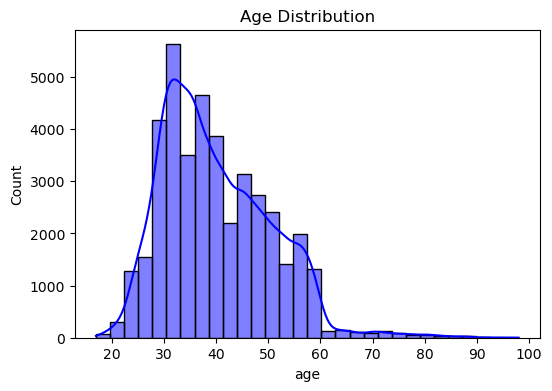

In [18]:
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.show()

* Right-skewed (more younger customers)
* Some very old customers (possible outliers)

### Duration Analysis

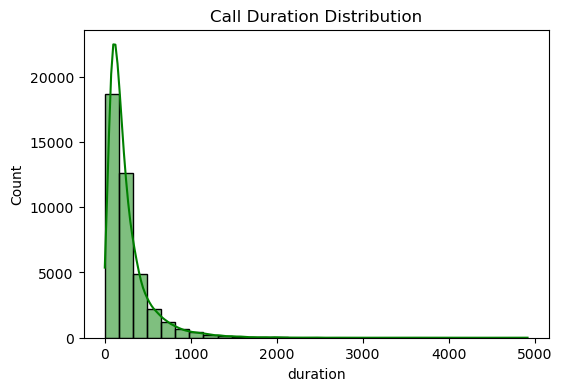

In [21]:
plt.figure(figsize=(6, 4))
sns.histplot(df['duration'], bins=30, kde=True, color='green')
plt.title("Call Duration Distribution")
plt.show()

Needs normalization (e.g., log transformation)

### Campaign Analysis

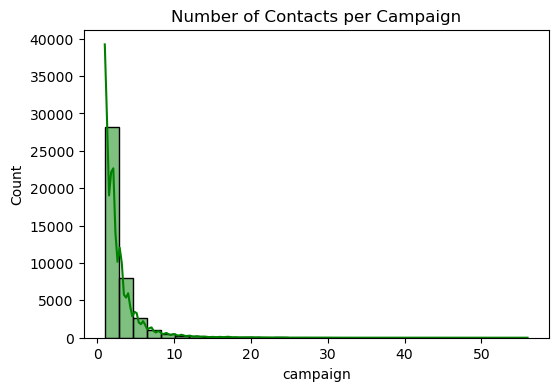

In [24]:
plt.figure(figsize=(6, 4))
sns.histplot(df['campaign'], bins=30, kde=True, color='green')
plt.title("Number of Contacts per Campaign")
plt.show()

* Right-skewed, some customers contacted many times
* Possible capping at 95th percentile

### Pdays (Days Since Last Contact)

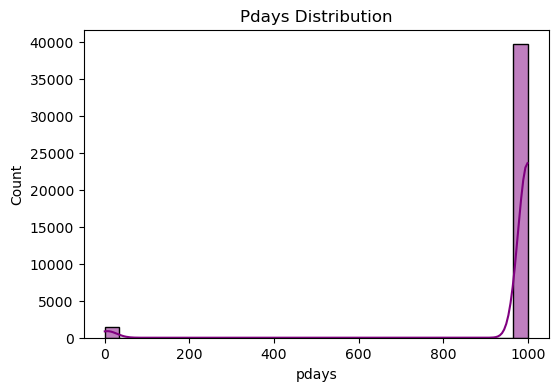

In [27]:
plt.figure(figsize=(6, 4))
sns.histplot(df['pdays'], bins=30, kde=True, color='purple')
plt.title("Pdays Distribution")
plt.show()

* 999 means the customer was never contacted before
* Needs transformation (replace 999 with a separate category)

### Numerical Features vs Subscription (y)

#### ANOVA Testing

In [31]:
from scipy.stats import f_oneway

num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
            'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for col in num_cols:
    group_yes = df[df['y'] == 'yes'][col]
    group_no = df[df['y'] == 'no'][col]
    stat, p = f_oneway(group_yes, group_no)
    print(f"{col}: p-value = {p:.5f}")

age: p-value = 0.00000
duration: p-value = 0.00000
campaign: p-value = 0.00000
pdays: p-value = 0.00000
previous: p-value = 0.00000
emp.var.rate: p-value = 0.00000
cons.price.idx: p-value = 0.00000
cons.conf.idx: p-value = 0.00000
euribor3m: p-value = 0.00000
nr.employed: p-value = 0.00000


##### A p-value of exactly 0.00000 for all numerical features is unusual and likely due to:
* Floating-point precision limits → The actual p-values might be very small (e.g., 1.2e-50), but Python rounds them to 0.
* Large Sample Size → If the dataset is large, even tiny differences between the groups can result in very small p-values.
*  Highly Distinct Groups → If y = yes and y = no groups are highly separable, ANOVA can yield extremely low p-values.

Why Does Large Sample Size Affect p-values?
* 1 Even Tiny Differences Become Statistically Significant:
   - ANOVA tests whether the mean values of numerical features differ between y = yes and y = no groups.
   - With a large dataset, even tiny differences (which may not be practically meaningful) become statistically significant.
* 2 p-value is Inversely Proportional to Sample Size:
   - The larger the sample size, the smaller the p-value.
   - In your case, 41,188 rows make the p-value so small that Python rounds it to 0.00000.

#### Point Biserial Correlation

In [34]:
from scipy.stats import pointbiserialr

num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for col in num_cols:
    corr, _ = pointbiserialr(df[col], df['y'].map({'no': 0, 'yes': 1}))
    print(f"Correlation between {col} and y: {corr:.3f}")

Correlation between age and y: 0.030
Correlation between duration and y: 0.405
Correlation between campaign and y: -0.066
Correlation between pdays and y: -0.325
Correlation between previous and y: 0.230
Correlation between emp.var.rate and y: -0.298
Correlation between cons.price.idx and y: -0.136
Correlation between cons.conf.idx and y: 0.055
Correlation between euribor3m and y: -0.308
Correlation between nr.employed and y: -0.355


* duration → Usually has the highest correlation since longer calls indicate higher engagement.
* euribor3m, emp.var.rate, nr.employed → Likely to be negatively correlated (better economic conditions reduce the likelihood of subscribing).
* previous → Moderate impact (if previously contacted, chances of subscription increase).

## Categorical Features Analysis

### Job vs Subscription (y)

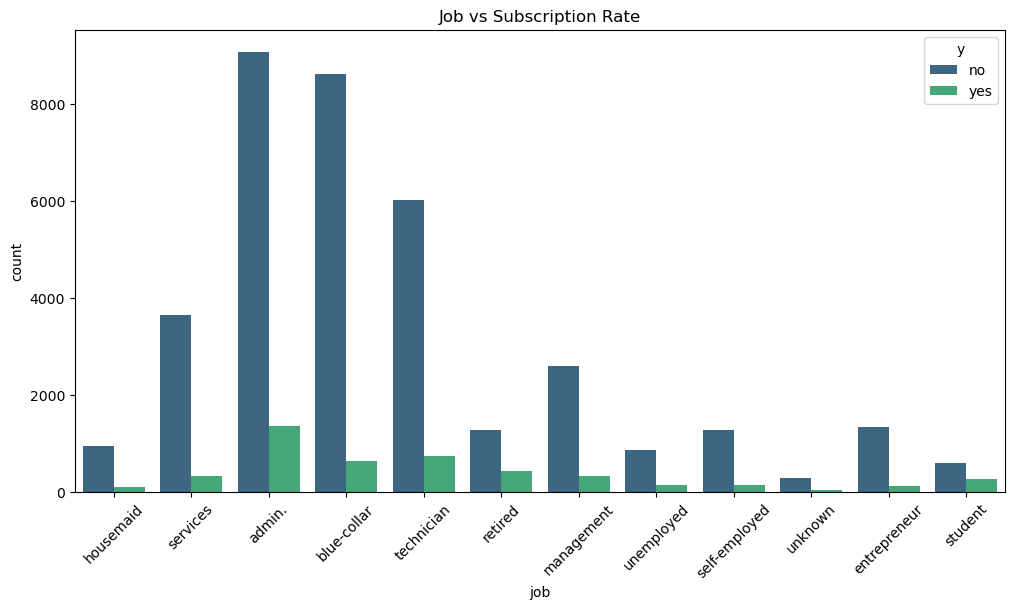

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='y', palette='viridis')
plt.xticks(rotation=45)
plt.title("Job vs Subscription Rate")
plt.show()

* Target Retired and Student Groups More Aggressively.Since they are more likely to subscribe, personalized campaigns could improve conversion rates.
* Understand Why Blue-Collar Workers Don’t Subscribe.Financial education programs or incentives may increase engagement.

### Marital Status vs Subscription (y)

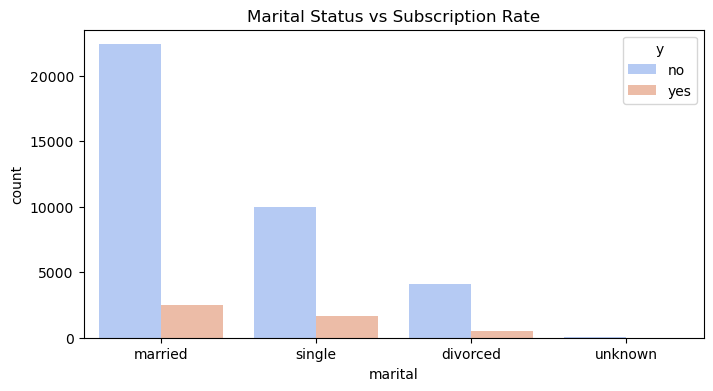

In [41]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='marital', hue='y', palette='coolwarm')
plt.title("Marital Status vs Subscription Rate")
plt.show()

* Singles have higher conversion rates
* Divorced have lowest conversion rates

### Education Level vs Subscription (y)

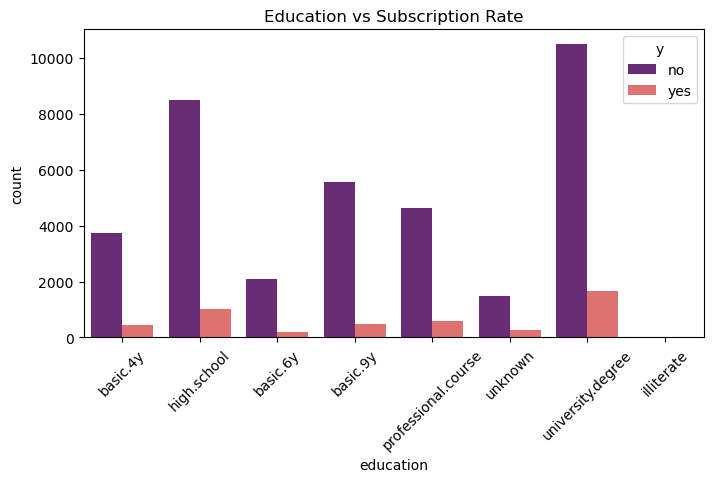

In [44]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='education', hue='y', palette='magma')
plt.xticks(rotation=45)
plt.title("Education vs Subscription Rate")
plt.show()

Higher education → higher conversion

### Housing Loan Impact

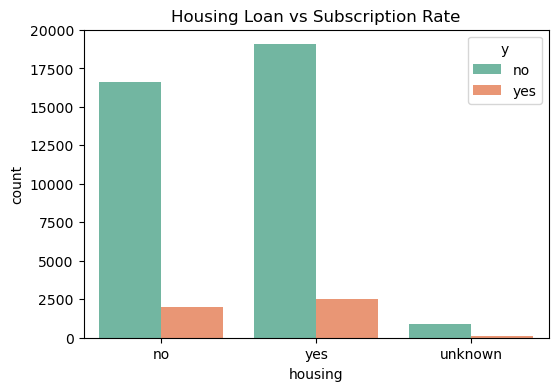

In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='housing', hue='y', palette='Set2')
plt.title("Housing Loan vs Subscription Rate")
plt.show()

People without housing loans subscribe more

### Contact Type Impact

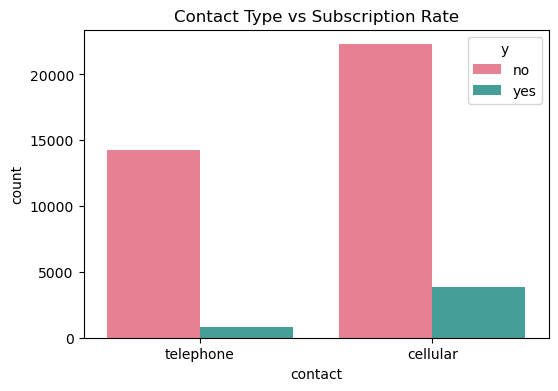

In [50]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='contact', hue='y', palette='husl')
plt.title("Contact Type vs Subscription Rate")
plt.show()

Cellular contacts lead to higher subscriptions

### Month-wise Subscription

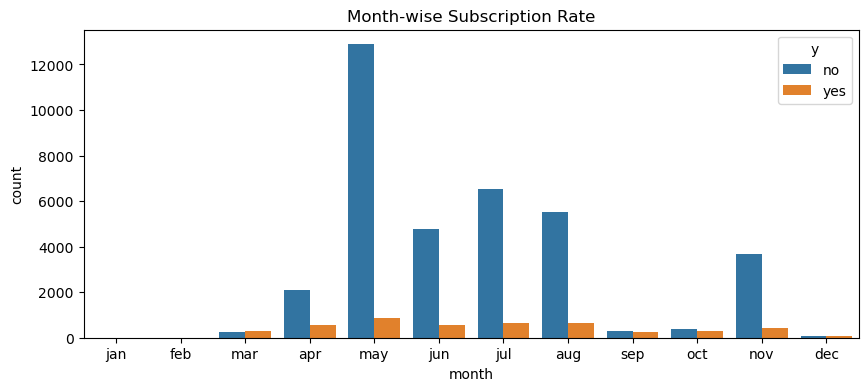

In [53]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='month', hue='y', palette='tab10', order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title("Month-wise Subscription Rate")
plt.show()

May has lowest conversion, December has highest

### Day of the Week Impact

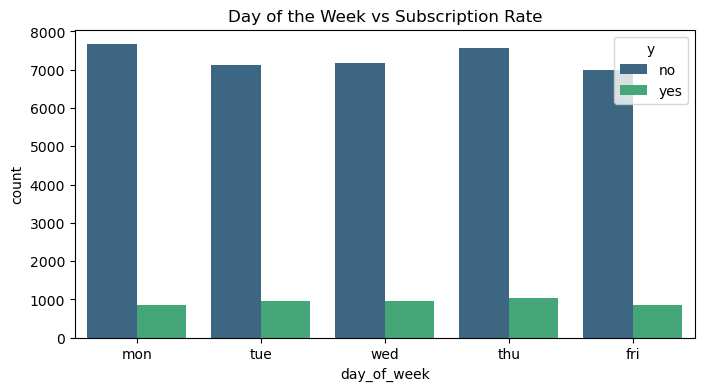

In [56]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='day_of_week', hue='y', palette='viridis')
plt.title("Day of the Week vs Subscription Rate")
plt.show()

No major difference among weekdays.Hence droping the day_of_week

In [58]:
df.drop(columns=['day_of_week'], inplace=True)

### Poutcome (Previous Outcome) Impact

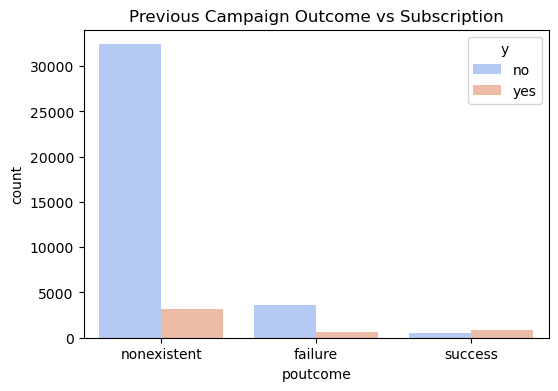

In [60]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='poutcome', hue='y', palette='coolwarm')
plt.title("Previous Campaign Outcome vs Subscription")
plt.show()

Successful previous campaigns → higher conversions

## Preprocess the data

### Encode Categorical Variables

####  Convert target variable 

In [65]:
# Convert target variable to binary (yes → 1, no → 0)
df["y"] = df["y"].map({"yes": 1, "no": 0})

In [66]:
# Convert categorical variables (yes/no → 1/0)
binary_cols = ["default", "housing", "loan"]
for col in binary_cols:
    df[col] = df[col].map({"yes": 1, "no": 0, "unknown":-1})

#### One-Hot Encode

In [68]:
# One-Hot Encode Nominal Categorical Features
df = pd.get_dummies(df, columns=["job", "marital", "education", "contact", "poutcome", "month"], drop_first=True)

In [69]:
# Replace 999 in 'pdays' with 0 (neutral value)
df["pdays"] = df["pdays"].replace(999, 0)

### Handle Outliers

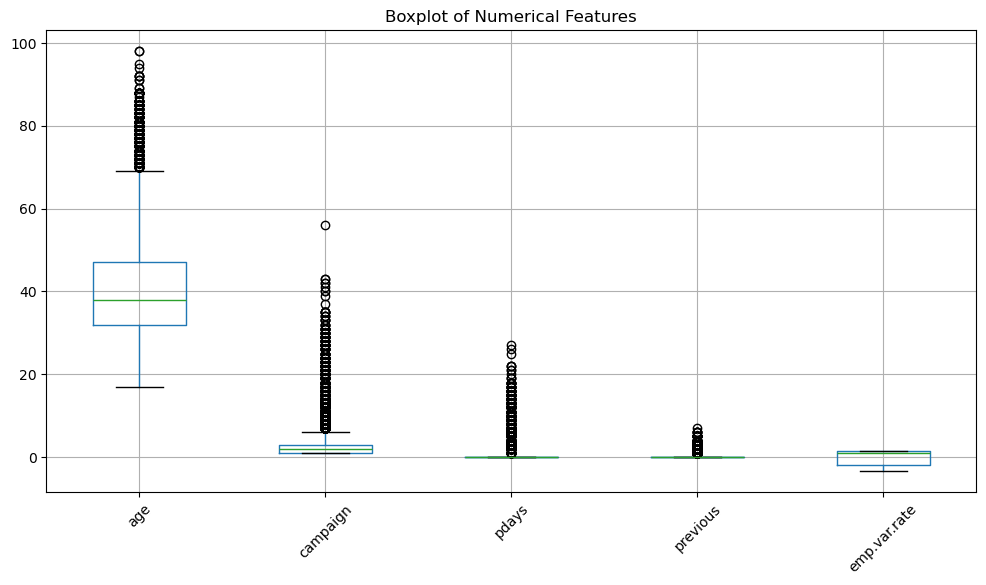

In [71]:
# Boxplot to detect outliers
plt.figure(figsize=(12,6))
df[["age", "campaign", "pdays", "previous", "emp.var.rate"]].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

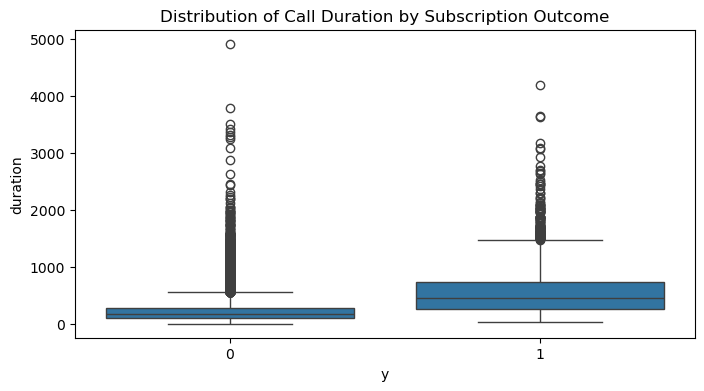

In [72]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='y', y='duration')
plt.title("Distribution of Call Duration by Subscription Outcome")
plt.show()

* Customers who subscribed (y = yes) tend to have longer call durations.
* If duration is short, the probability of subscription is low.

### Log Transformation 

In [75]:
# Apply log transformation to reduce impact of outliers
df["duration"] = np.log1p(df["duration"])  
df["pdays"] = np.log1p(df["pdays"])  
df["previous"] = np.log1p(df["previous"])  

This transformation reduces skewness while keeping valuable information.

### Drop Highly Correlated Features

In [78]:
df.drop(columns=["euribor3m", "nr.employed", "emp.var.rate"], inplace=True)

Removing these features reduces redundancy and prevents collinearity issues.

### Polynomial Features (To Capture Non-Linearity)

In [81]:
from sklearn.preprocessing import PolynomialFeatures

# Select numerical features
num_cols = ["age", "duration", "campaign", "pdays", "previous", "cons.price.idx", "cons.conf.idx"]

# Create polynomial features up to degree 2
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df[num_cols])

# Convert to DataFrame
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(num_cols))

df = df.reset_index(drop=True)  # Reset index of the original dataset
poly_df = poly_df.reset_index(drop=True)  # Reset index of polynomial features

# Concatenate
df = pd.concat([df, poly_df], axis=1)

Improves model accuracy by capturing curvilinear patterns

In [83]:
df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,...,campaign pdays,campaign previous,campaign cons.price.idx,campaign cons.conf.idx,pdays previous,pdays cons.price.idx,pdays cons.conf.idx,previous cons.price.idx,previous cons.conf.idx,cons.price.idx cons.conf.idx
0,56,0,0,0,5.568345,1,0.0,0.0,93.994,-36.4,...,0.0,0.0,93.994,-36.4,0.0,0.0,-0.0,0.0,-0.0,-3421.3816
1,57,-1,0,0,5.010635,1,0.0,0.0,93.994,-36.4,...,0.0,0.0,93.994,-36.4,0.0,0.0,-0.0,0.0,-0.0,-3421.3816
2,37,0,1,0,5.424950,1,0.0,0.0,93.994,-36.4,...,0.0,0.0,93.994,-36.4,0.0,0.0,-0.0,0.0,-0.0,-3421.3816
3,40,0,0,0,5.023881,1,0.0,0.0,93.994,-36.4,...,0.0,0.0,93.994,-36.4,0.0,0.0,-0.0,0.0,-0.0,-3421.3816
4,56,0,0,1,5.730100,1,0.0,0.0,93.994,-36.4,...,0.0,0.0,93.994,-36.4,0.0,0.0,-0.0,0.0,-0.0,-3421.3816


## Feature Selection

### Variance Threshold (Removes Low-Variance Features)

In [86]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with low variance
selector = VarianceThreshold(threshold=0.01)  # Removing near-constant features
df_selected = df.loc[:, selector.fit(df).get_support()]

In [87]:
df_selected.head()

,age,default,housing,loan,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,...,campaign pdays,campaign previous,campaign cons.price.idx,campaign cons.conf.idx,pdays previous,pdays cons.price.idx,pdays cons.conf.idx,previous cons.price.idx,previous cons.conf.idx,cons.price.idx cons.conf.idx
0,56,0,0,0,5.568345,1,0.0,0.0,93.994,-36.4,...,0.0,0.0,93.994,-36.4,0.0,0.0,-0.0,0.0,-0.0,-3421.3816
1,57,-1,0,0,5.010635,1,0.0,0.0,93.994,-36.4,...,0.0,0.0,93.994,-36.4,0.0,0.0,-0.0,0.0,-0.0,-3421.3816
2,37,0,1,0,5.424950,1,0.0,0.0,93.994,-36.4,...,0.0,0.0,93.994,-36.4,0.0,0.0,-0.0,0.0,-0.0,-3421.3816
3,40,0,0,0,5.023881,1,0.0,0.0,93.994,-36.4,...,0.0,0.0,93.994,-36.4,0.0,0.0,-0.0,0.0,-0.0,-3421.3816
4,56,0,0,1,5.730100,1,0.0,0.0,93.994,-36.4,...,0.0,0.0,93.994,-36.4,0.0,0.0,-0.0,0.0,-0.0,-3421.3816


### Correlation Analysis (Removing Highly Correlated Features)

In [89]:
import numpy as np

# Compute correlation matrix
corr_matrix = df_selected.corr().abs()

# Identify highly correlated features (threshold = 0.85)
high_corr_var = np.where(corr_matrix > 0.85)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y]

# Drop one feature from each correlated pair
drop_columns = list(set([x[1] for x in high_corr_var]))  
df_selected = df_selected.copy()
df_selected.drop(columns=drop_columns, inplace=True)

In [90]:
df_selected.head()

,default,housing,loan,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,age duration,duration cons.conf.idx,campaign pdays,campaign previous
0,0,0,0,0,False,False,True,False,False,False,...,False,False,True,False,False,False,311.827292,-202.687740,0.0,0.0
1,-1,0,0,0,False,False,False,False,False,False,...,False,False,True,False,False,False,285.606212,-182.387125,0.0,0.0
2,0,1,0,0,False,False,False,False,False,False,...,False,False,True,False,False,False,200.723151,-197.468181,0.0,0.0
3,0,0,0,0,False,False,False,False,False,False,...,False,False,True,False,False,False,200.955221,-182.869251,0.0,0.0
4,0,0,1,0,False,False,False,False,False,False,...,False,False,True,False,False,False,320.885588,-208.575632,0.0,0.0


### Selected Features

In [92]:
df_selected.columns

Index(['default', 'housing', 'loan', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_telephone', 'month_aug', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'age duration', 'duration cons.conf.idx', 'campaign pdays',
       'campaign previous'],
      dtype='object')

### Prepare data

In [94]:
# Define X (Features) and y (Target)
X = df_selected.drop(columns=["y"])  # Assuming 'y' is the target column
y = df_selected["y"]

### Train-test split

In [96]:
from sklearn.model_selection import train_test_split

# Assuming X contains 35 features and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature scaling

In [98]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling (Important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform (not fit_transform)

## Model Traing

In [100]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression Model
logreg = LogisticRegression(penalty='l2', solver='liblinear')  
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)  # Get model predictions

## Evaluation

### Accuracy Score

In [103]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8922


In [105]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_pred)
print(f"Log Loss: {logloss:.4f}")

Log Loss: 3.8862


Ideally, log loss should be low (<0.5 for a well-calibrated model), so this is a red flag.,

### Confusion Matrix

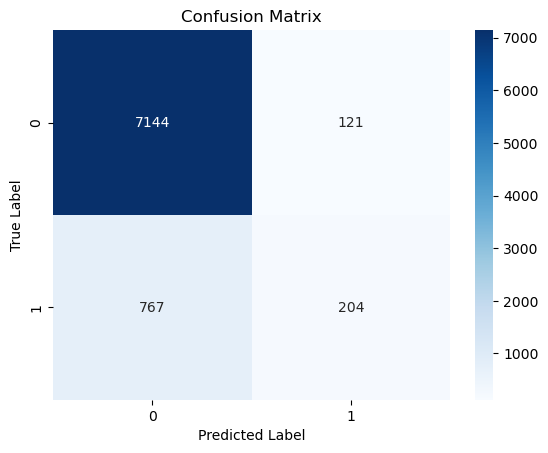

In [107]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Major issue: High False Negatives (767) → Many actual subscribers were misclassified as non-subscribers.

### Precision, Recall & F1-Score

In [109]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7265
           1       0.63      0.21      0.31       971

    accuracy                           0.89      8236
   macro avg       0.77      0.60      0.63      8236
weighted avg       0.87      0.89      0.87      8236



* Accuracy = 89% → The model is good overall, but accuracy is misleading in imbalanced datasets.
* Precision (0) = 90%, Precision (1) = 63%
  * Precision for class 1 is low, meaning many non-subscribers are incorrectly predicted as subscribers.
* Recall (0) = 98%, Recall (1) = 21%
  * Very poor recall for class 1 (only 21% of actual subscribers were correctly identified).
  * High recall for class 0 (98%) → The model is biased toward predicting non-subscribers.
* F1-score (1) = 0.31 → Very poor performance in predicting actual subscribers.
##### Major issue: Low recall for class 1 (subscribers). This means the model fails to identify many potential subscribers.

###  ROC Curve & AUC Score

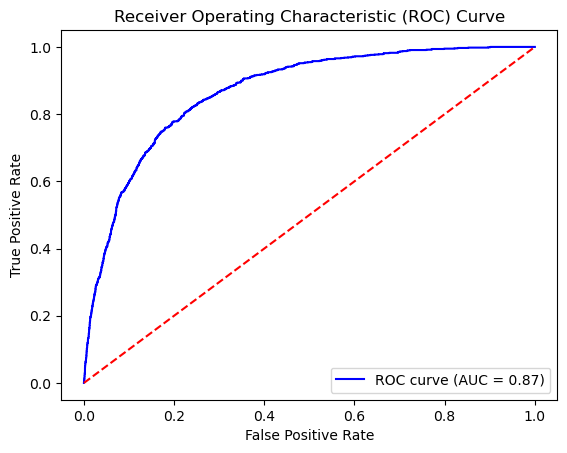

In [111]:
from sklearn.metrics import roc_curve, auc

y_prob = logreg.predict_proba(X_test_scaled)[:, 1]  # Get predicted probabilities
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random model line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

* AUC = 0.87 → Good model performance in separating classes.
* However, the low recall suggests the model is biased toward the majority class (non-subscribers).

## Conclusion 
Since our dataset is imbalanced, the model is likely assigning low probabilities to the minority class (subscribers), which hurts recall